<a href="https://colab.research.google.com/github/tejaswi-2230/Crime-prediction/blob/main/Crimes_Against_SC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #numerical operations in Python.
import pandas as pd #data manipulation and analysis.
import matplotlib.pyplot as plt   #creates static, interactive, and animated visualizations.
import seaborn as sns  #high-level interface for creating attractive statistical graphics.
import geopandas as gpd  #support geographical data types and operations.
from matplotlib import cm   #color maps(cm) for visualizations.
import matplotlib
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sc01 = pd.read_csv("/content/drive/MyDrive/Info/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [ ]:
frames = [sc01]
sc = pd.concat(frames)

sc['STATE/UT'] = sc['STATE/UT'].str.capitalize()
sc['DISTRICT'] = sc['DISTRICT'].str.capitalize()


sc['STATE/UT'].unique()

# sc['DISTRICT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [ ]:
sc01.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


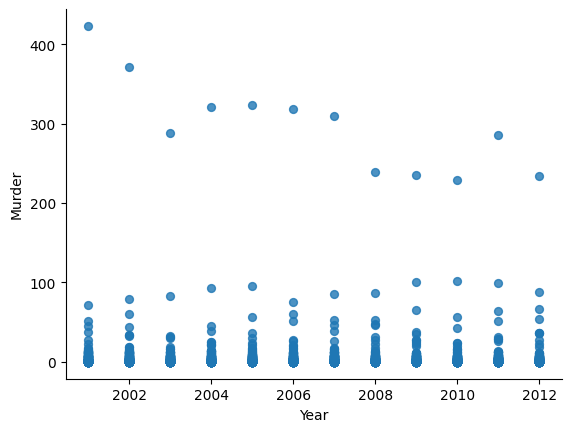

In [ ]:
# @title Year vs Murder

from matplotlib import pyplot as plt
sc01.plot(kind='scatter', x='Year', y='Murder', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

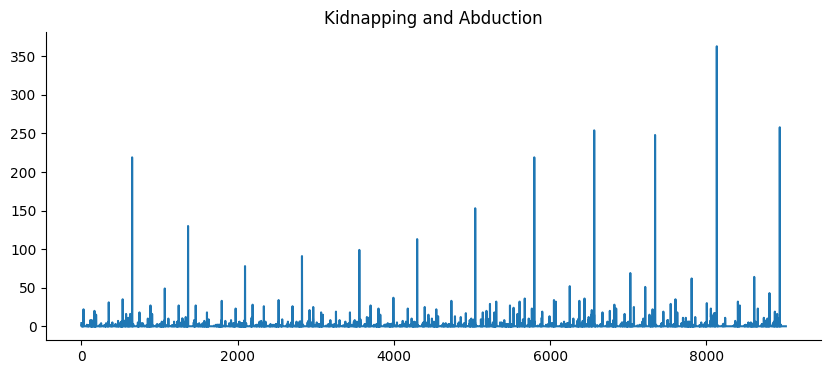

In [ ]:
# @title Kidnapping and Abduction

from matplotlib import pyplot as plt
sc01['Kidnapping and Abduction'].plot(kind='line', figsize=(10, 4), title='Kidnapping and Abduction')
plt.gca().spines[['top', 'right']].set_visible(False)

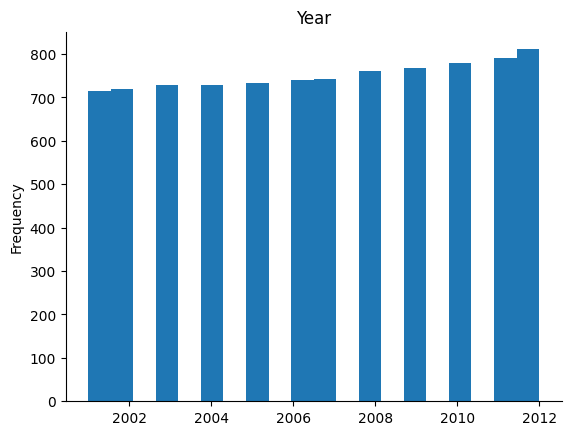

In [ ]:
# @title Year

from matplotlib import pyplot as plt
sc01['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
yearsc = sc[sc.DISTRICT == 'Total']
yearsc = yearsc.groupby(['Year'])[['Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']].sum().reset_index()

yearsc['sum'] = yearsc.drop('Year', axis=1).sum(axis=1)

yearsc = yearsc[['Year','sum']]

In [ ]:
scy = sc[sc.DISTRICT == 'Total']
scy = scy.groupby(['Year'])[['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']].sum().reset_index()

crimes = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

fig = go.Figure()
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Murder'],name='Murder',line=dict(color='indigo', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Rape'],name='Rape',line=dict(color='green', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Kidnapping and Abduction'],name='Kidnapping and Abduction',line=dict(color='orange', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Dacoity'],name='Dacoity',line=dict(color='darkorange', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Robbery'],name='Robbery',line=dict(color='black', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Arson'],name='Arson',line=dict(color='skyblue', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Hurt'],name='Hurt',line=dict(color='royalblue', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Prevention of atrocities (POA) Act'],name='Atrocities',line=dict(color='firebrick', width=4)))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Protection of Civil Rights (PCR) Act'],mode='lines+markers',name='Civil Rights Violations'))

fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Other Crimes Against SCs'],name='Other Crimes',line=dict(color='red', width=4)))

fig.update_layout(uniformtext_minsize= 20,title_text="Total Crimes Against Scs 2001-2012",    )

fig.show()

Above graph reveals that over the years the number of reported cases of Hurt , Atrocity , Rape and other Crimes are increased whereas the rate of reporting other crimes has stayed the almost same.

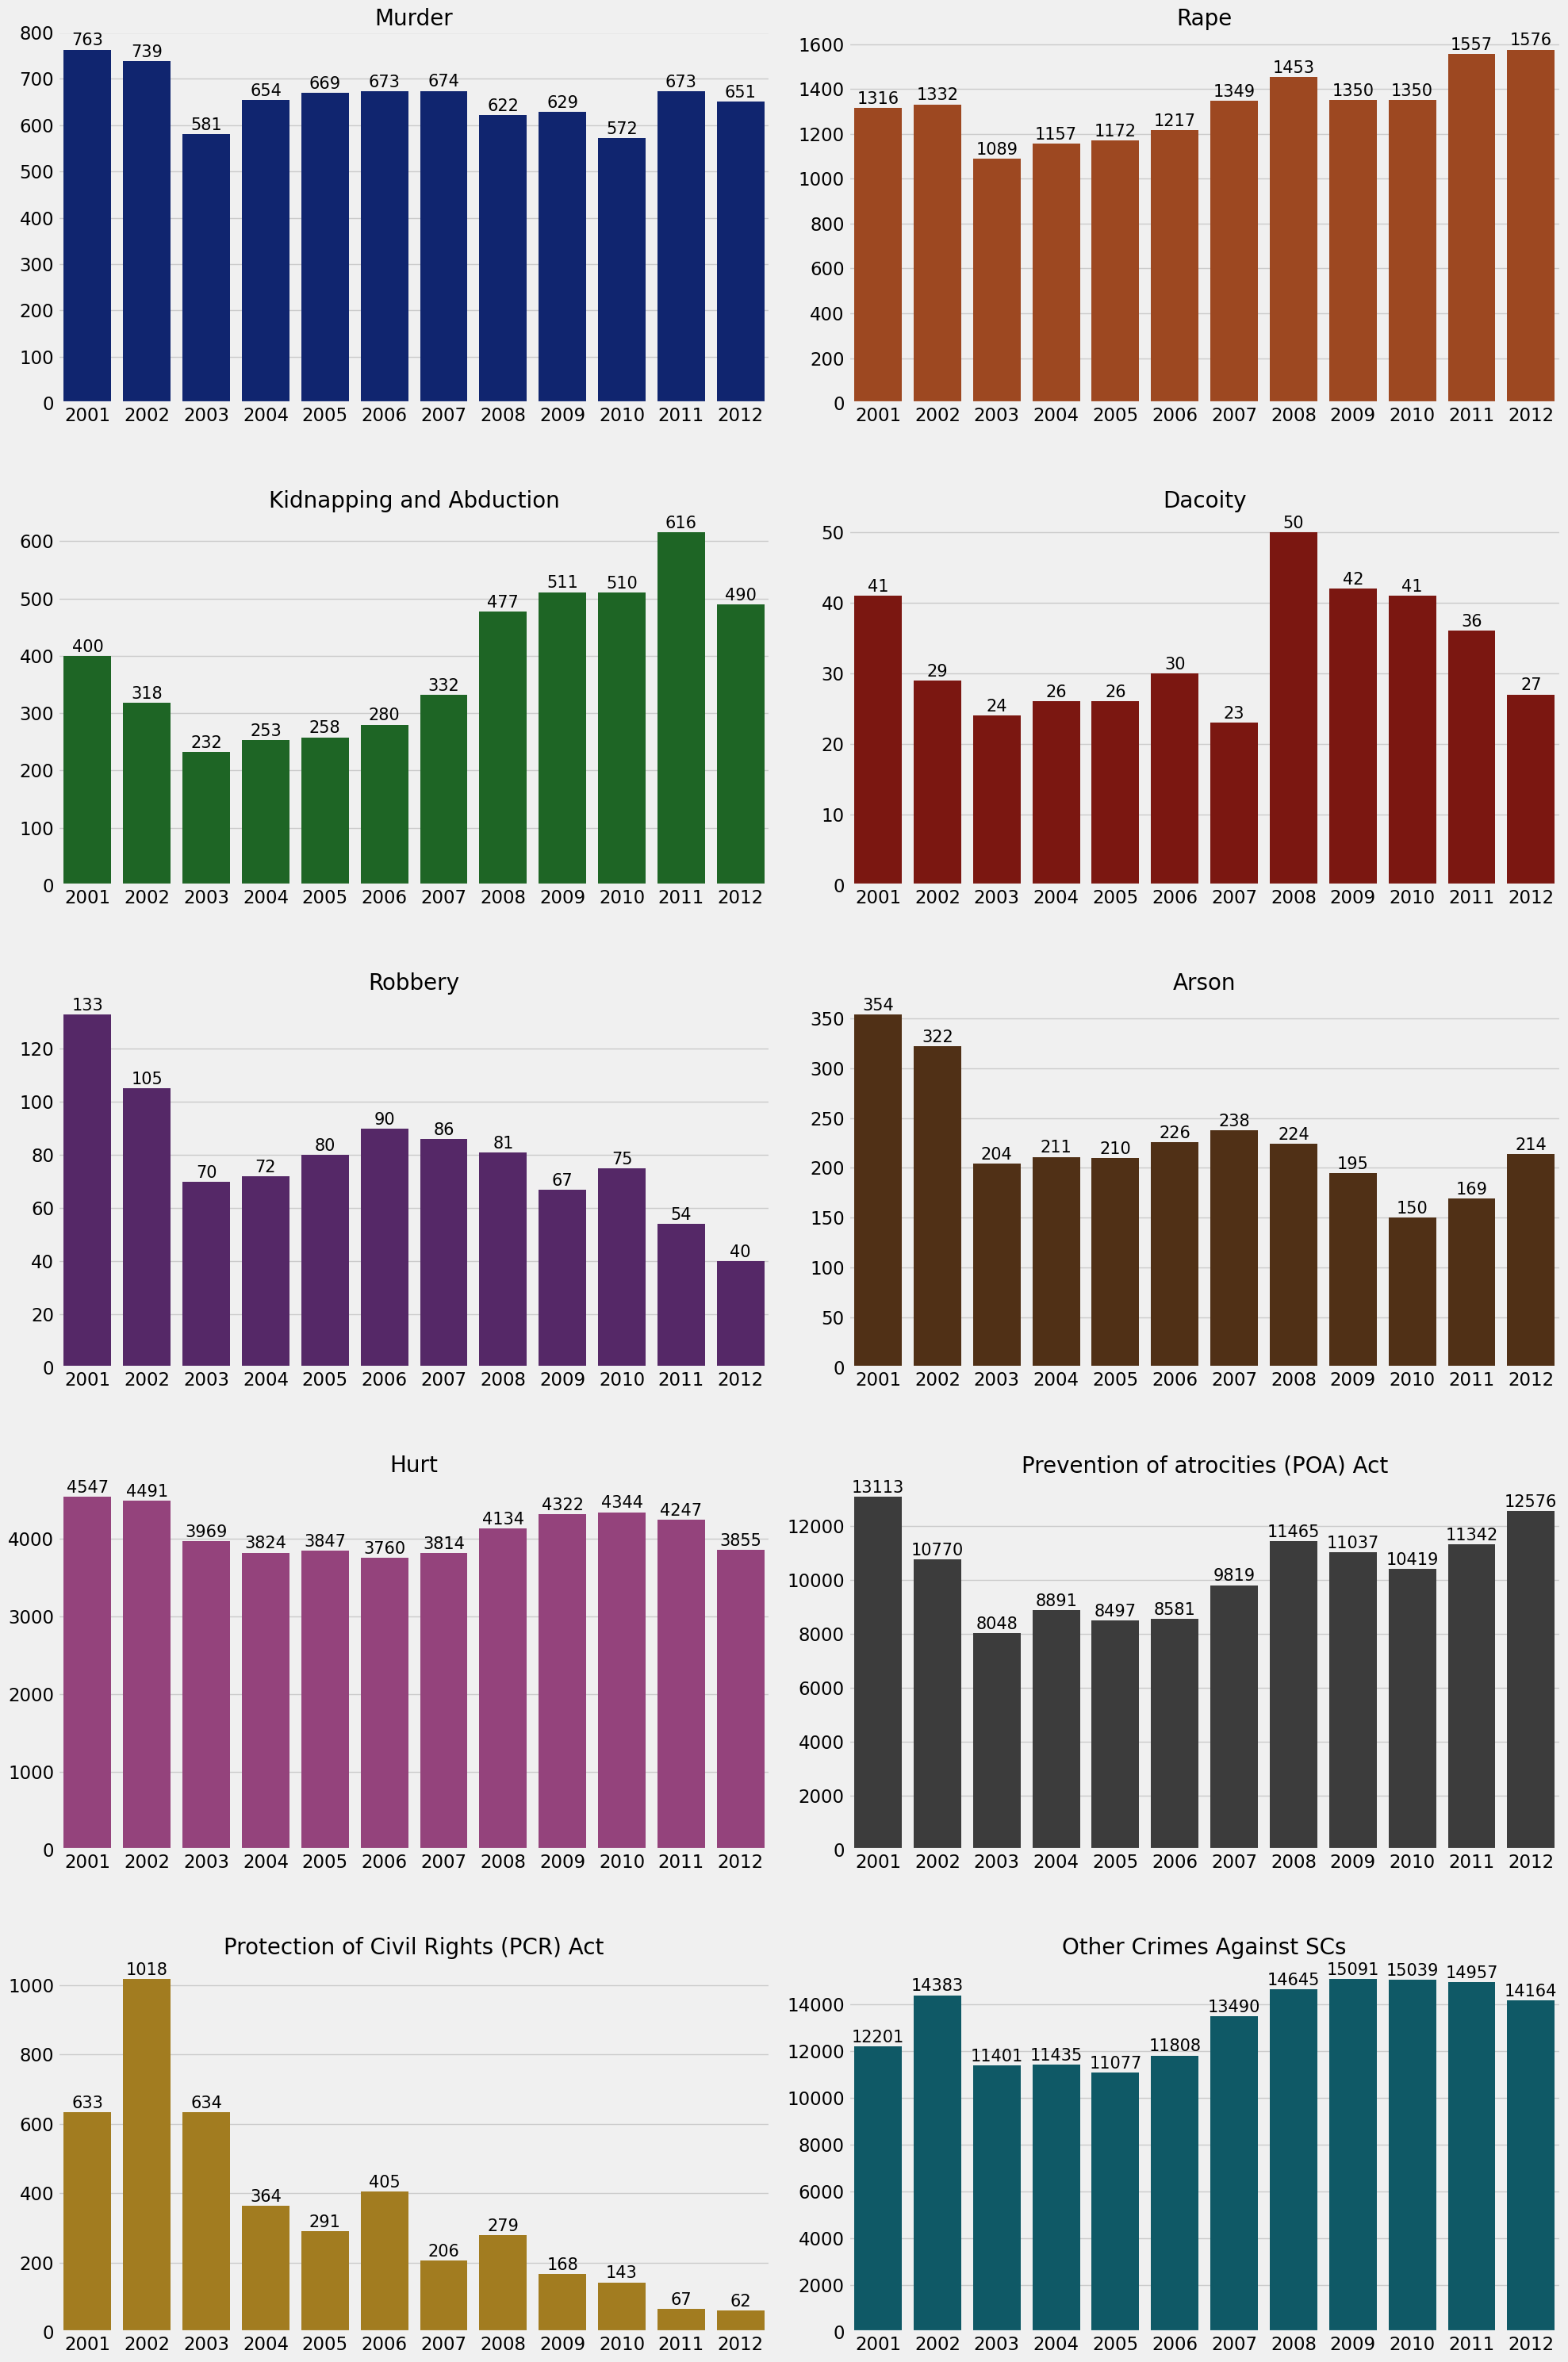

In [ ]:
#Plotting Graphs
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scy, x='Year', y= column , color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


In [ ]:
# scy = scy.sum().rename('total')
# scy['Year'].replace(26091, 'Total', inplace=True)
# scy = scy[scy['Year'] == 'Total']
# scy_t = scy.T.reset_index()
# scy_t


In [ ]:
import plotly.graph_objects as go

labels = ['Murder', 'Rape','Kidnapping', 'Dacoity', 'Robbery', 'Arson', 'Hurt','Atrocities  Act','Civil Rights Act', 'Other Crimes']

values = [8576, 17991, 5305, 440,1015,2906, 54055 , 138533, 4332,176488]

fig = go.Figure(data=[go.Pie(labels=labels, values=values ,textinfo='label+percent',)])

fig.update_layout(
    uniformtext_minsize= 20,
    title_text="Distribution of Crimes Against Scs 2001 - 2012",
    paper_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=700,
    height=700)

fig.show()


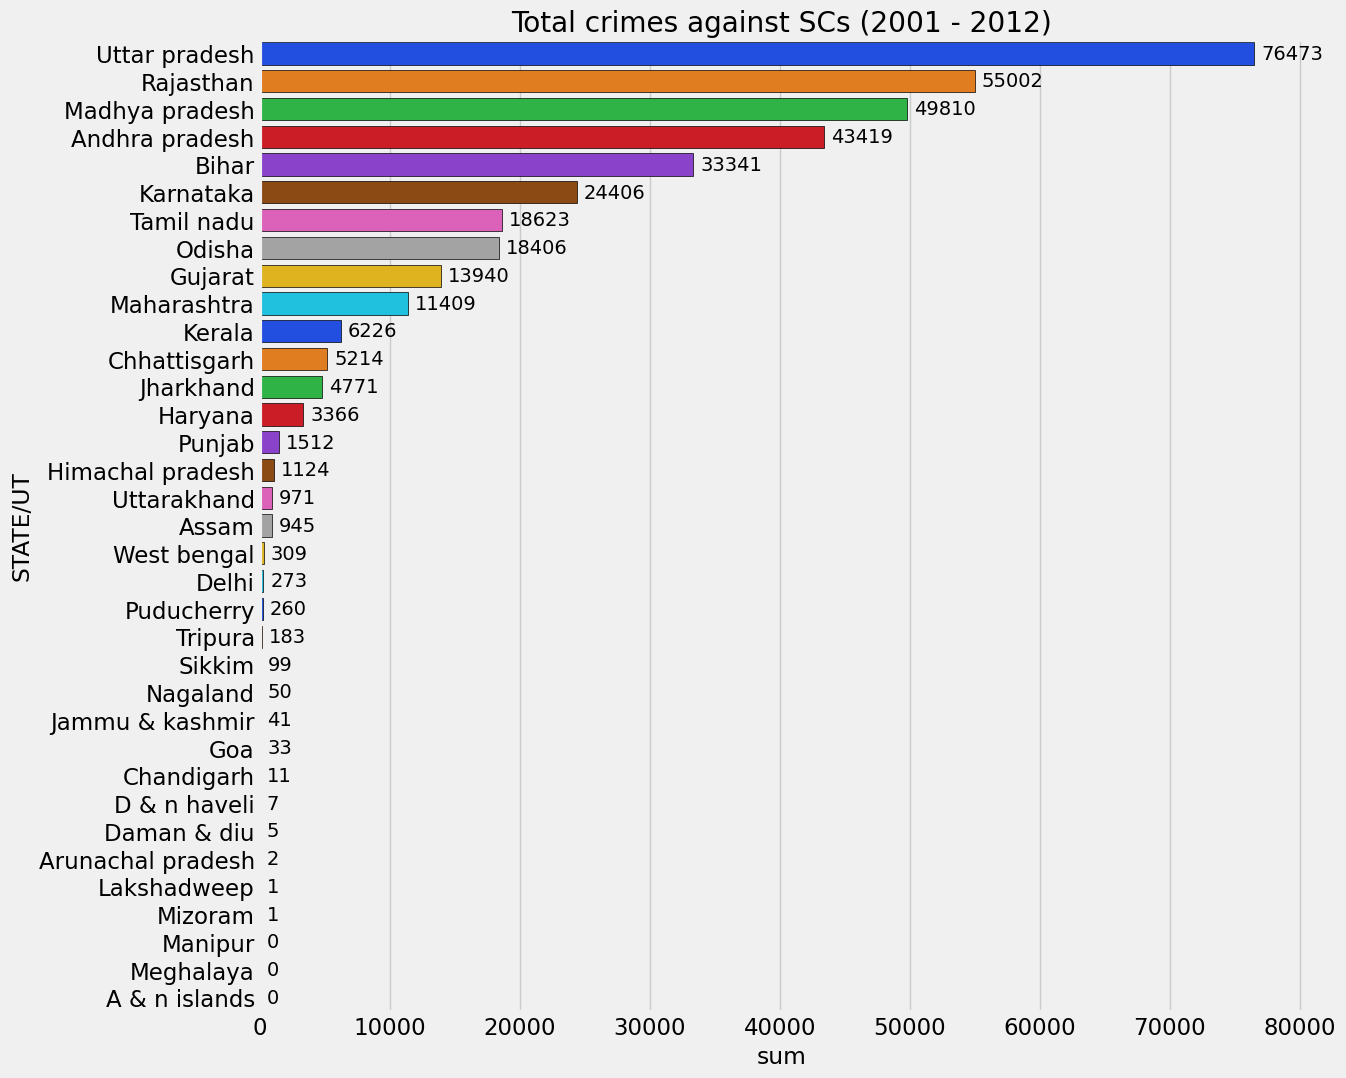

In [ ]:
stateyr = sc[sc.DISTRICT == 'Total']
stateyr = stateyr.groupby(['Year','STATE/UT'])[['Murder', 'Rape','Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt','Prevention of atrocities (POA) Act',
  'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']].sum().reset_index()

stateyr['sum'] =  stateyr.iloc[:, 2:].sum(axis=1)

stateyr2 = stateyr.groupby('STATE/UT')['sum'].sum().reset_index()

stateyr2 = stateyr2.sort_values('sum', ascending = False)

plt.figure(figsize = (12,12))

sns.set_context("talk")

plt.style.use("fivethirtyeight")

ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyr2, palette = 'bright', edgecolor = 'black')

plt.title('Total crimes against SCs (2001 - 2012)')

for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

ValueError: num must be an integer with 1 <= num <= 10, not 11

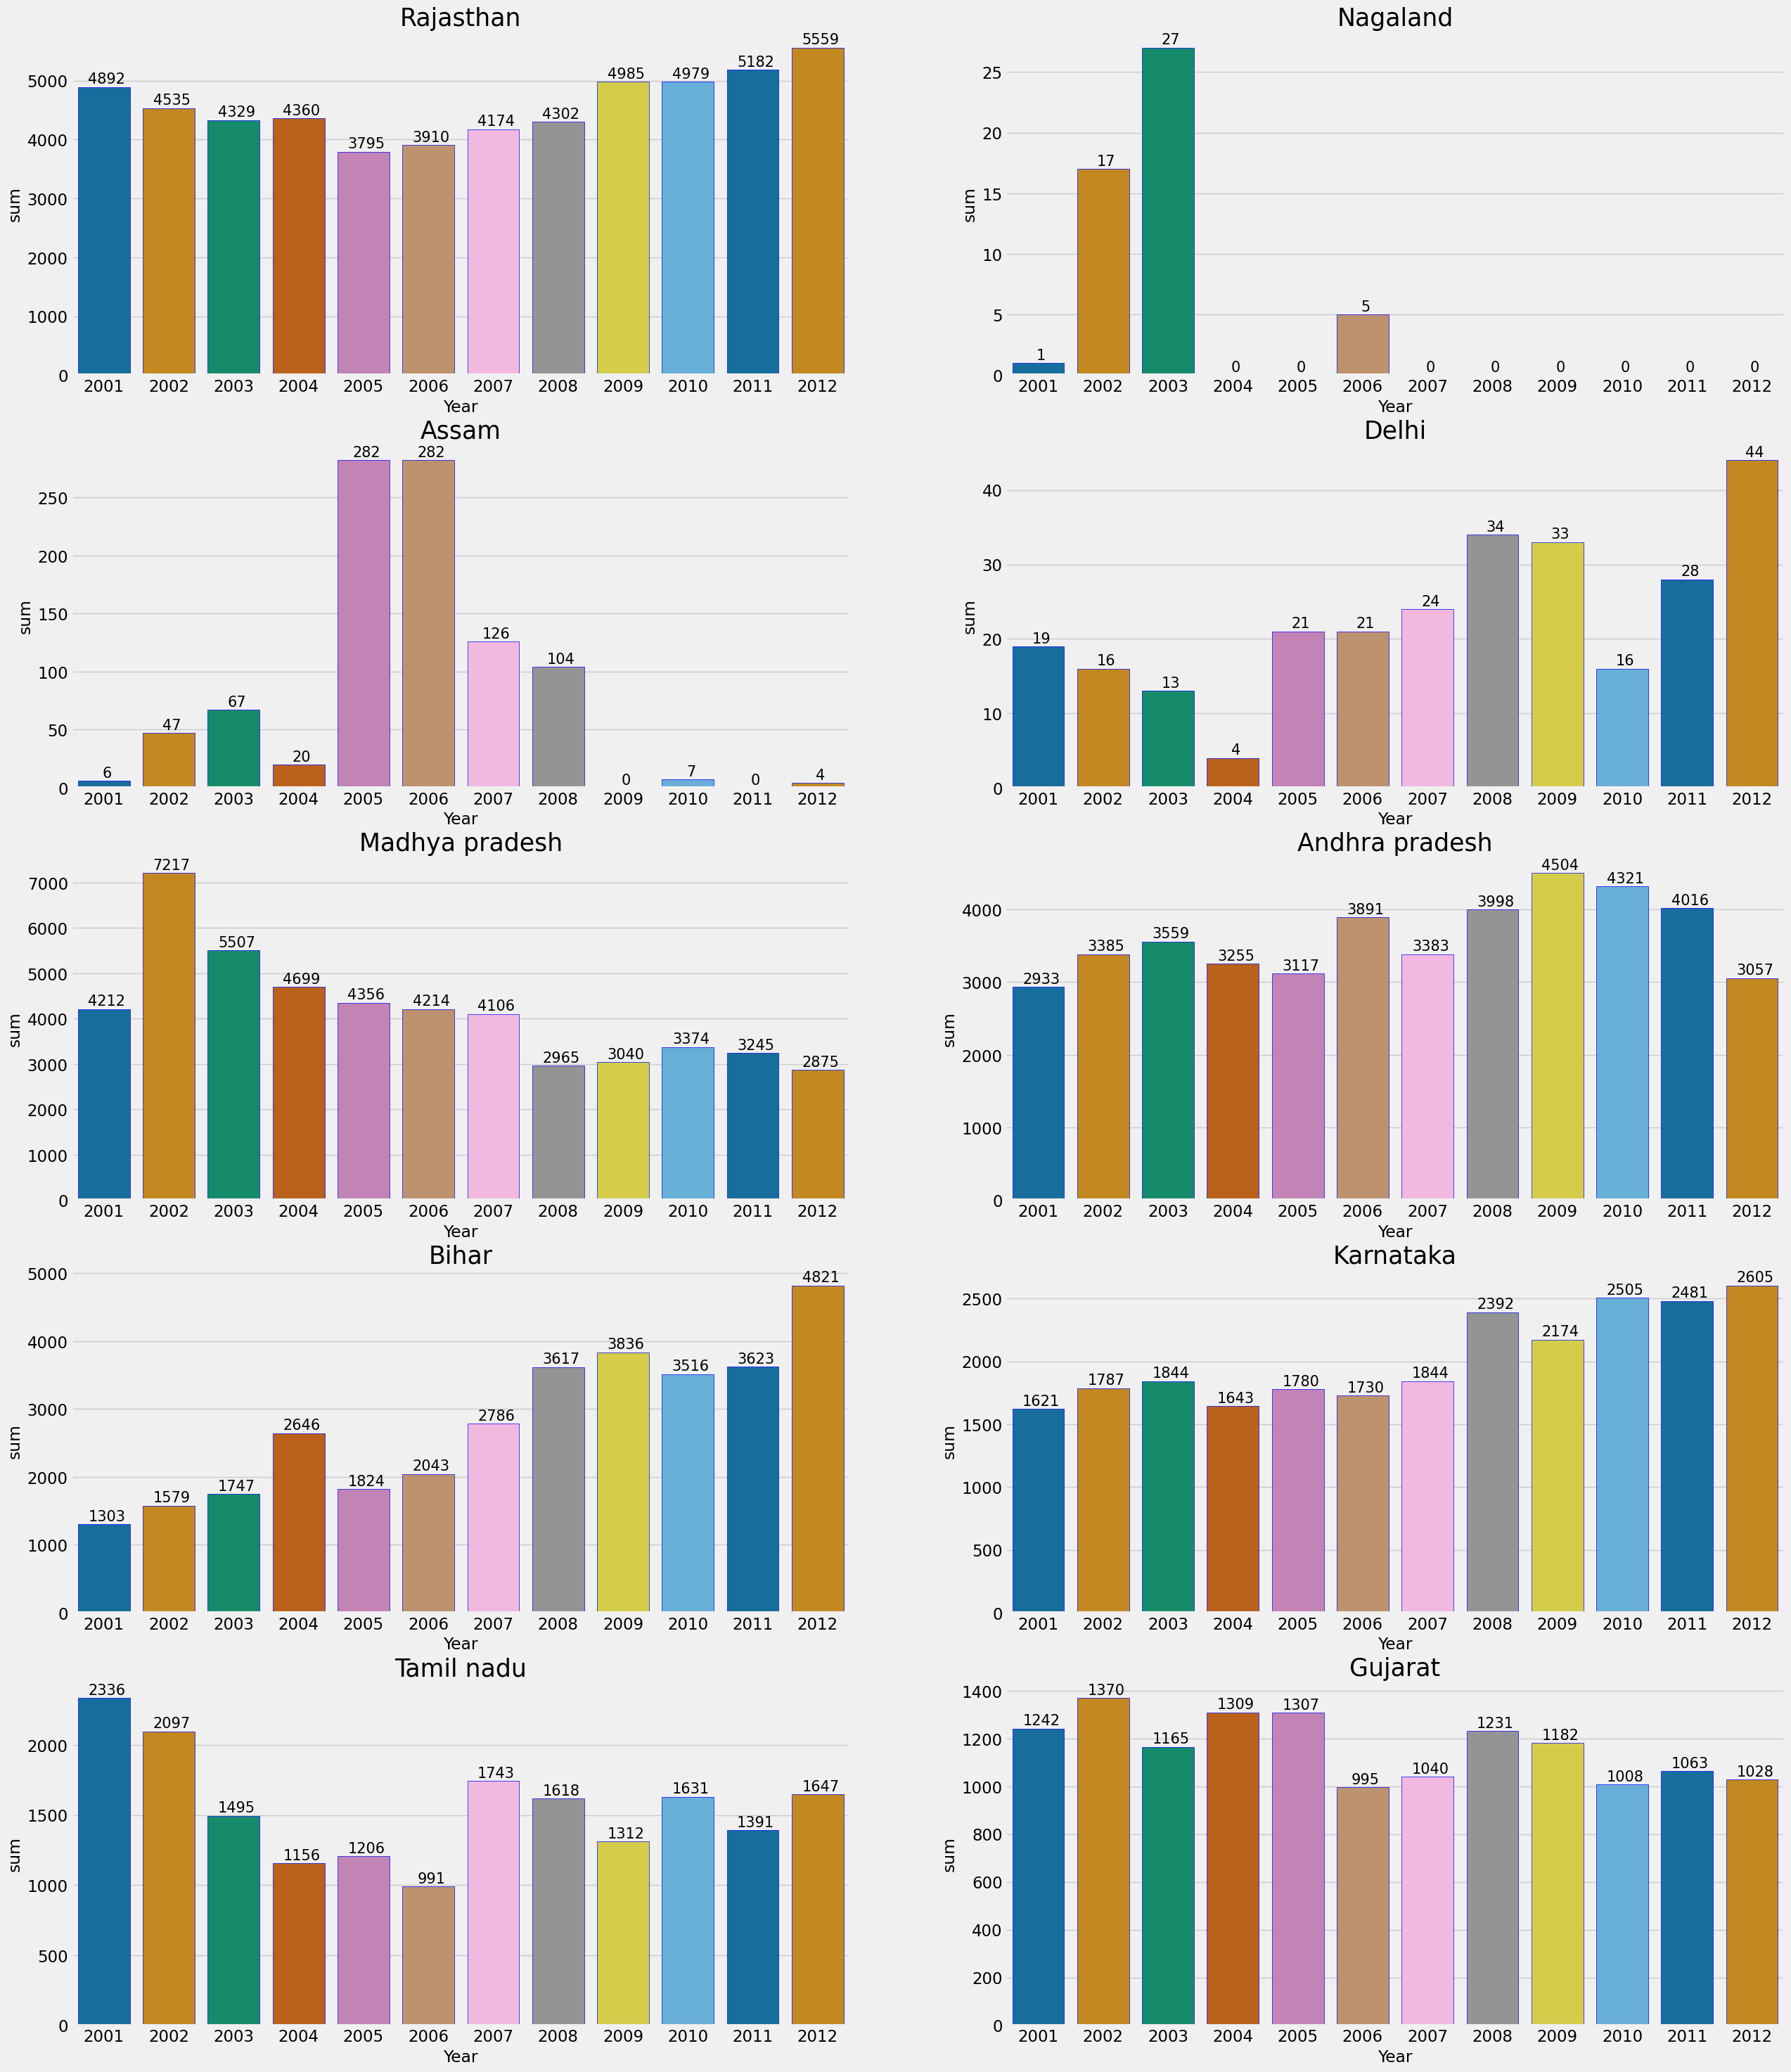

In [ ]:
states = ['Rajasthan' , 'Nagaland', 'Assam', 'Delhi', 'Madhya pradesh' , 'Andhra pradesh', 'Bihar', 'Karnataka' , 'Tamil nadu','Gujarat', 'Lakshadweep']

sns.set_context("talk")

plt.style.use("fivethirtyeight")

plt.figure(figsize = (28,35))

for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyr3 = stateyr[stateyr['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyr3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(3, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.subplots_adjust(hspace= .3)


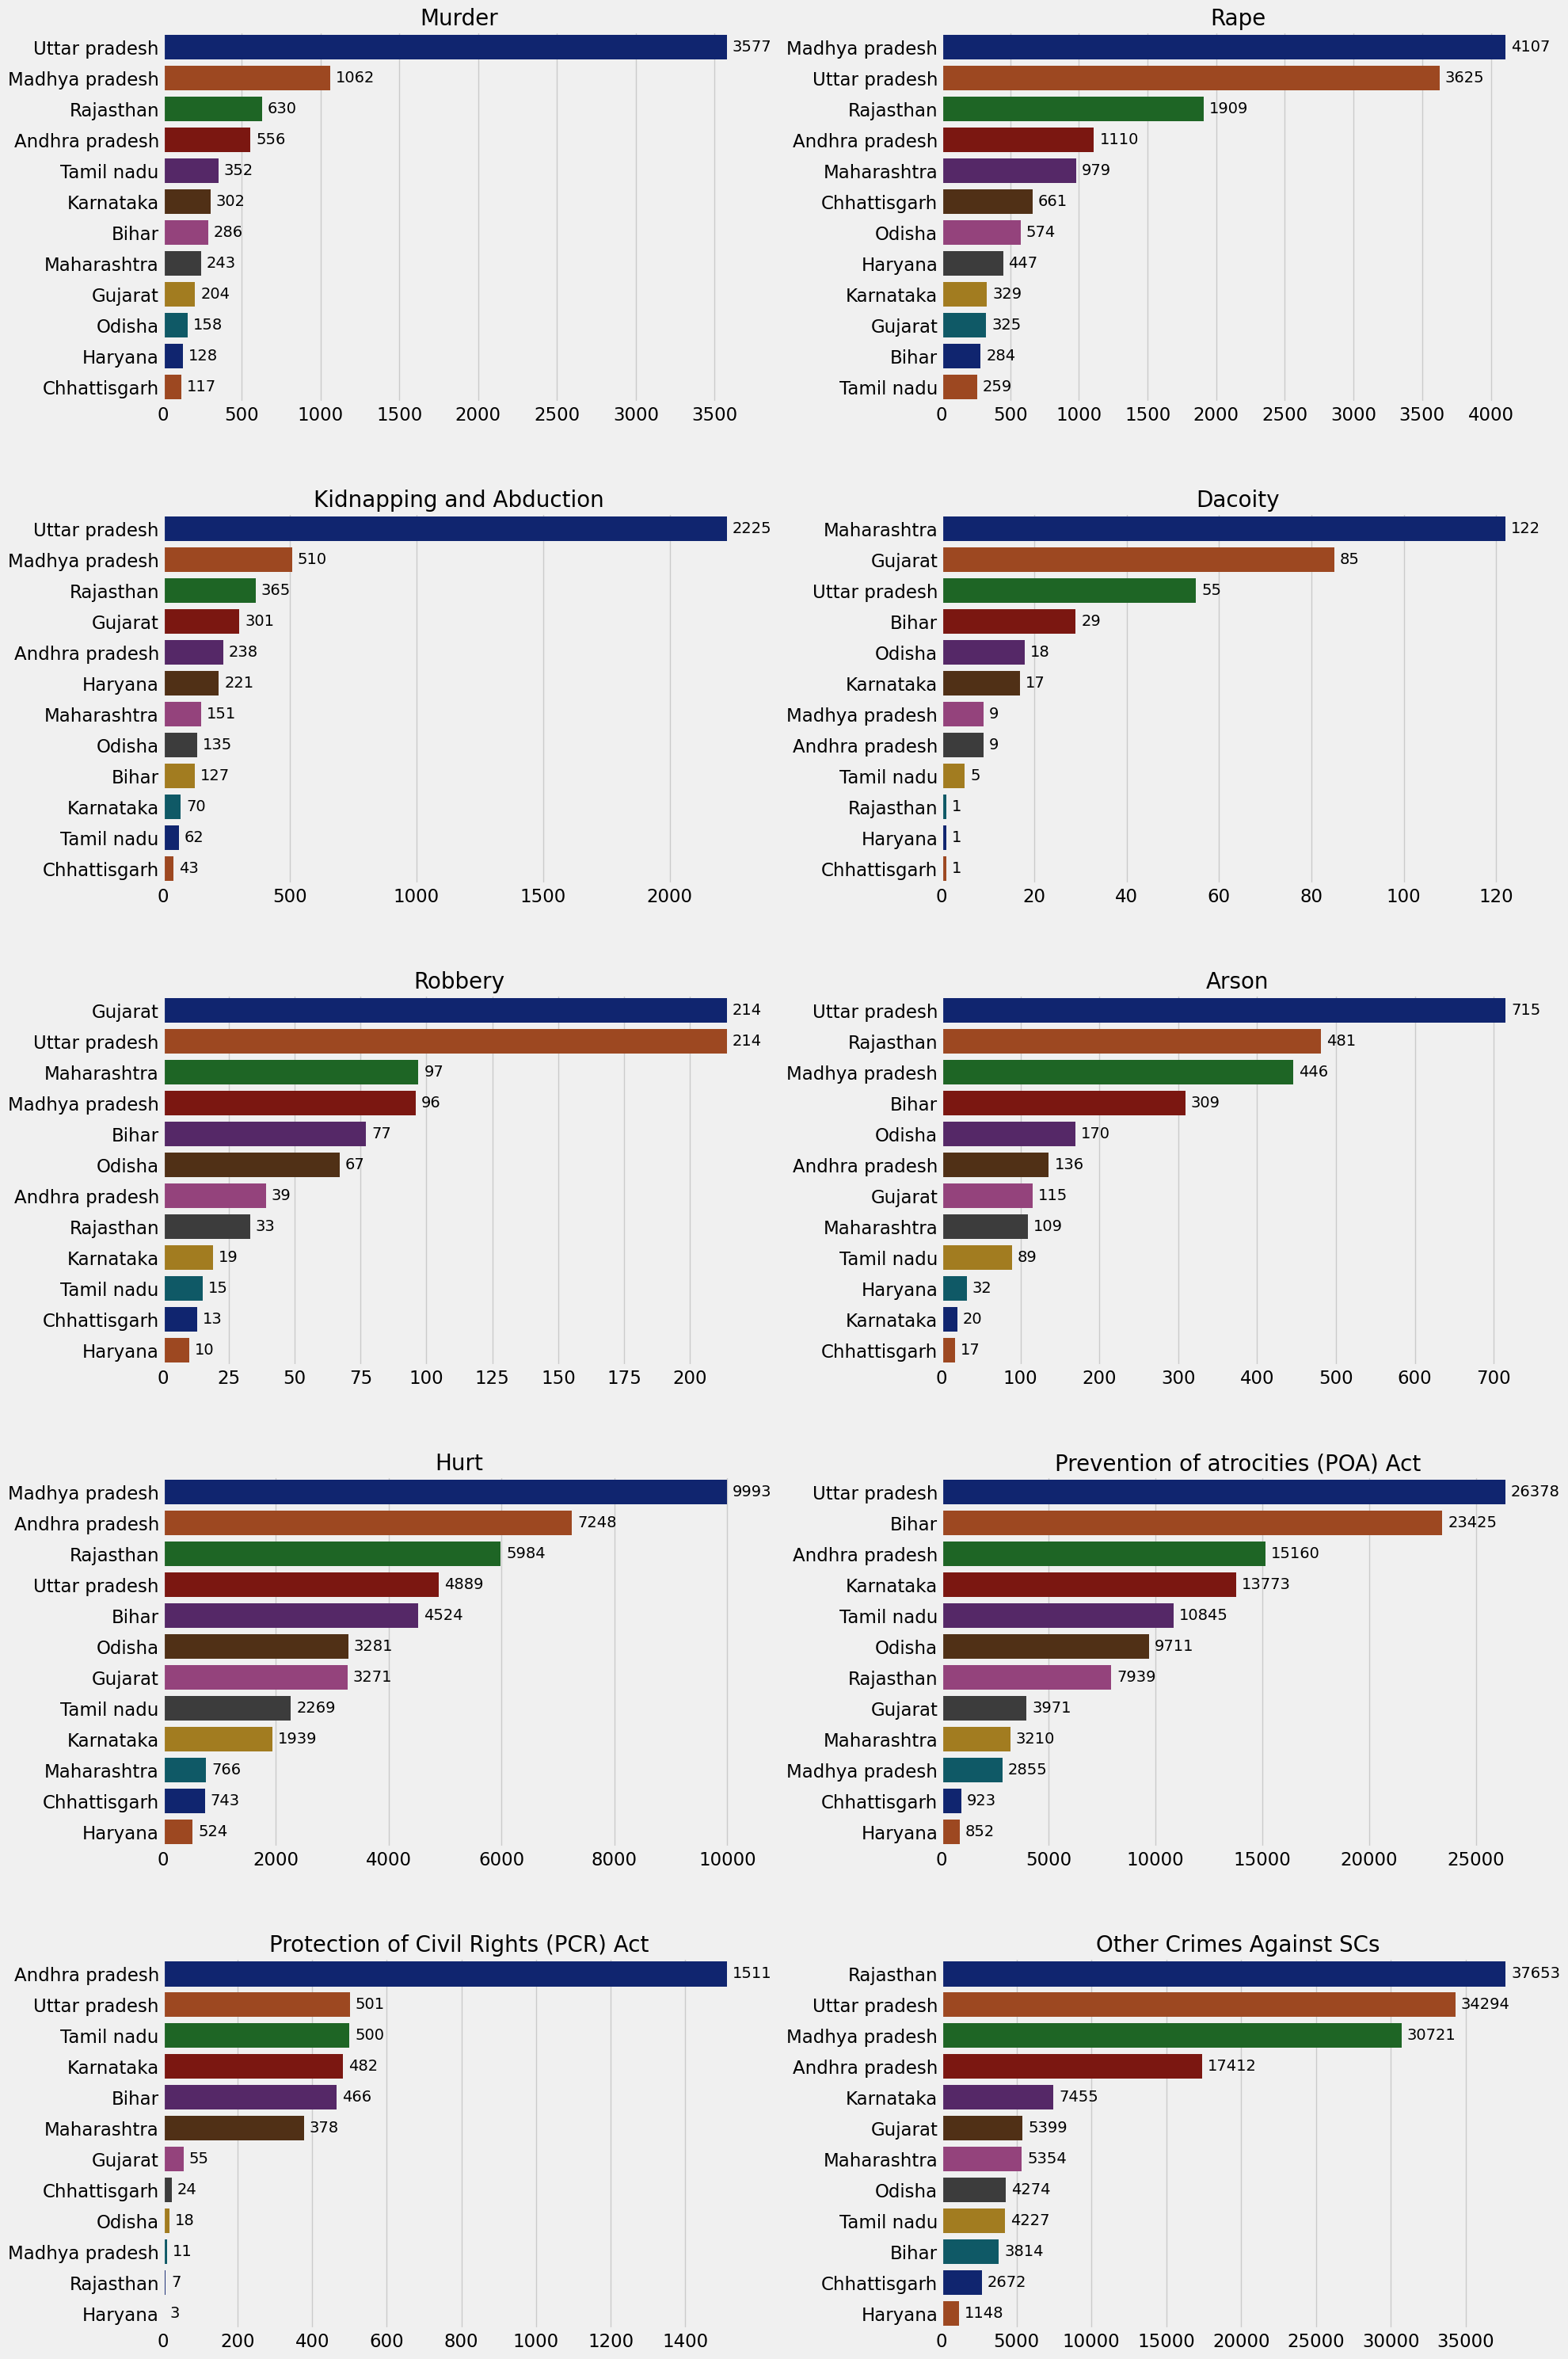

In [ ]:
scs = sc[sc.DISTRICT == 'Total']
scs = scs.groupby(['STATE/UT'])[['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']].sum().reset_index()

scs1 = scs[(scs.Murder > 100) & (scs.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scs1 = scs1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= scs1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# **Statewise graphs shows that Uttarpradesh , Rajasthan , Maharashtra and Madhyapradesh are the states where the number of reported cases of violence against scheduled caste is higher .**

**Total Crimes**

In [ ]:
scd = sc[sc.DISTRICT != 'Total']
scd = scd.groupby(['DISTRICT'])[['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']].sum().reset_index()

scd['sum'] = (scd['Murder'] +
             scd['Rape'] +
             scd['Kidnapping and Abduction'] +
             scd['Dacoity']+scd['Robbery'] +
             scd['Arson']+scd['Hurt'] +
             scd['Prevention of atrocities (POA) Act'] +
             scd['Protection of Civil Rights (PCR) Act'] +
             scd['Other Crimes Against SCs'])

In [ ]:
mostviolent = scd.groupby(['DISTRICT'])['sum'].sum().sort_values(ascending = False).reset_index()
mostviolent = mostviolent.head(15)

In [ ]:
import plotly.graph_objects as go

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x= mostviolent['DISTRICT'], y= mostviolent['sum'],
            text= mostviolent['sum'],
            textposition='auto',marker_color='rgb(255, 22, 22)'
        )])
fig.update_layout(title_text='Most Violent Districts')

fig.show()

# **Over the span of 13 years, Bharatpur, a district in Rajasthan, emerges with the highest tally of caste-based crimes. This stark statistic underlines a concerning trend, suggesting the prevalence of deeply entrenched social biases and inequalities within the region. Such a concentration of caste-related offenses in Bharatpur underscores the urgent need for targeted interventions and comprehensive societal reforms to address systemic discrimination and promote social harmony and equality.**

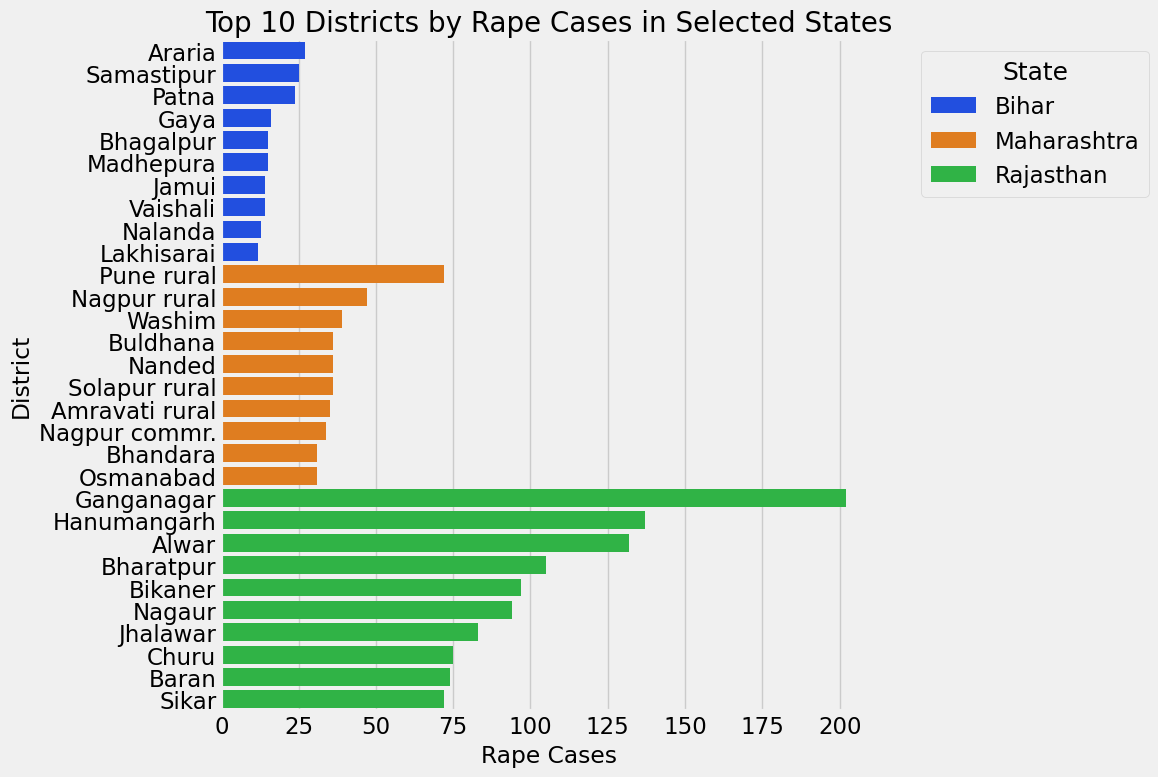

In [ ]:
# Filter districts other than 'Total' and group by state and district
scsd = sc[sc.DISTRICT != 'Total']
scsd = scsd.groupby(['STATE/UT', 'DISTRICT']).sum().reset_index()

# Define the states of interest
states = ['Rajasthan', 'Maharashtra', 'Bihar' ] # 'Andhra Pradesh', 'Uttar Pradesh','Madhya Pradesh'

# Filter data for the specified states
scsd_filtered = scsd[scsd['STATE/UT'].isin(states)]

# Sort the data by Rape cases in descending order and select top 10 districts for each state
scsd_sorted = scsd_filtered.groupby('STATE/UT').apply(lambda x: x.nlargest(10, 'Rape')).reset_index(drop=True)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=scsd_sorted, x='Rape', y='DISTRICT', hue='STATE/UT', dodge=False, palette='bright')
plt.xlabel('Rape Cases')
plt.ylabel('District')
plt.title('Top 10 Districts by Rape Cases in Selected States', size=20)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


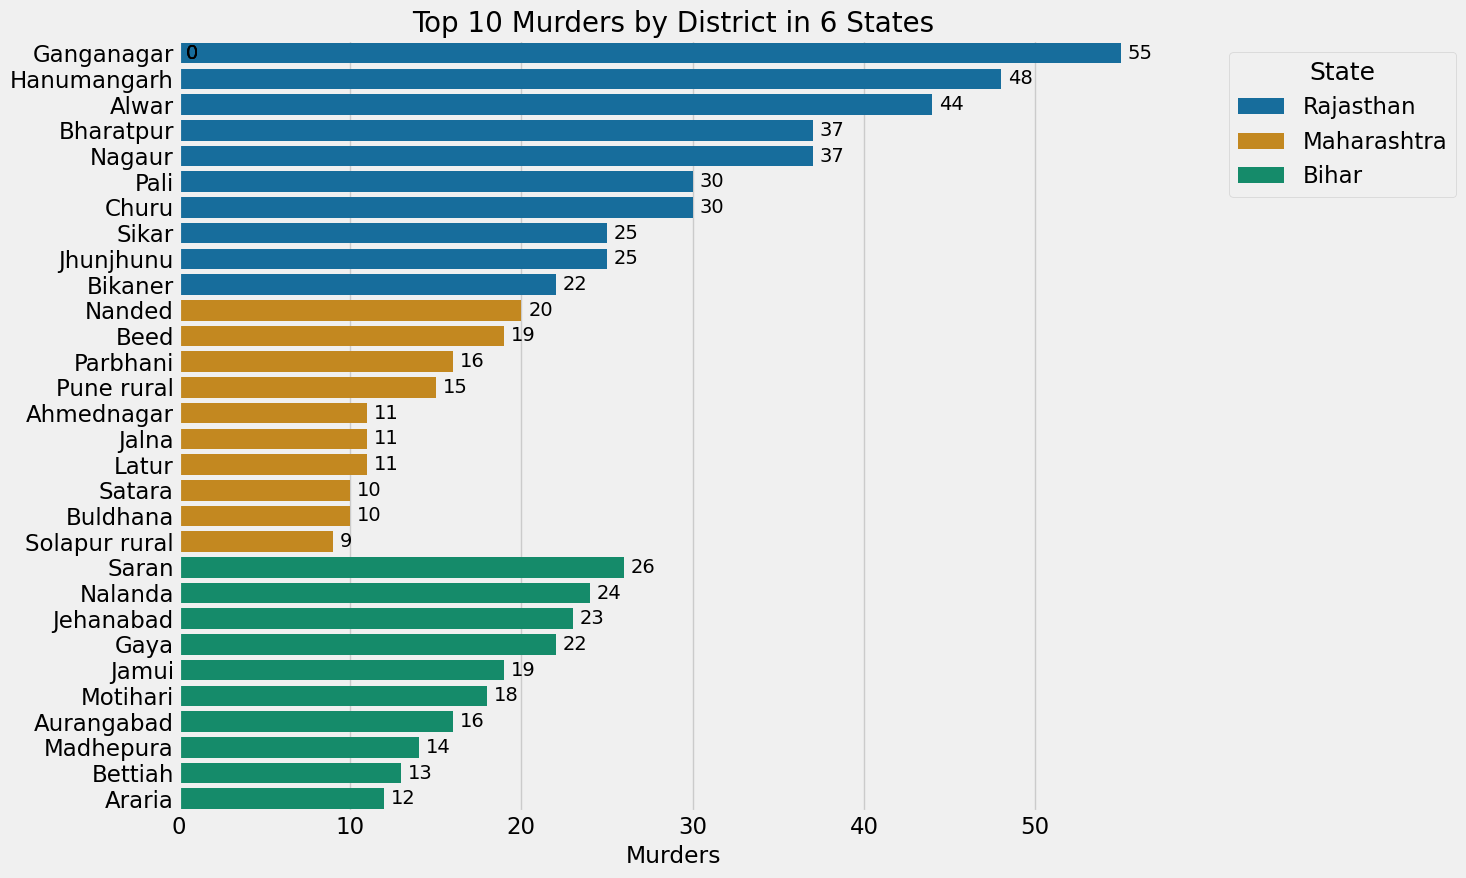

In [ ]:
plt.figure(figsize=(12,9))
plt.style.use('fivethirtyeight')

# Concatenate data for all states
scsd_concat = pd.concat([scsd[scsd['STATE/UT'] == state].sort_values('Murder', ascending=False).head(10) for state in states])

# Create a bar plot for all states
ax = sns.barplot(data=scsd_concat, x='Murder', y='DISTRICT', hue='STATE/UT', palette='colorblind')

plt.xlabel('Murders')
plt.ylabel('')
plt.title('Top 10 Murders by District in 6 States', size=20)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **Despite the government's concerted efforts, incidents of atrocities and violence against Scheduled Castes (SCs) have been on the rise over the years. States like Rajasthan, Uttar Pradesh, Bihar, Maharashtra, and Madhya Pradesh emerge as hotspots for such crimes, indicating persistent challenges in ensuring the safety and security of marginalized communities. These regions demand heightened attention and comprehensive strategies to address the root causes of discrimination and violence, promoting inclusive and equitable societies.**